In [1]:
# important imports.
import numpy as np
import matplotlib.pyplot as plt

# get the MNIST dataset from sklearn dataset. It's computationally easier if downloaded from sklearn.
# original dataset can be found at http://yann.lecun.com/exdb/mnist/
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
x, y = mnist['data'], mnist['target'] # (70,000 images of 28x28 features)

In [3]:
# splitting the dataset. using first 60,000 data for training and rest for test set.
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

# shuffle the training set to ensure consistent cross-validation folds.
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]
x_test[9300].shape

(784,)

In [4]:
# import MLPclassifier for scikit learn
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,), random_state=42)
clf.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [5]:
clf.predict([x_test[9300]])

array([4.])

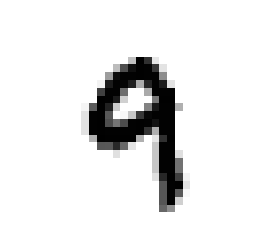

In [6]:
import matplotlib.pyplot as plt
import matplotlib

digit = x_test[9300]
arr = digit.reshape(28, 28)
plt.imshow(arr, cmap= matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

In [7]:
# let's evaluate MLPClassifier using cross-val_score using k-fold cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.87992402, 0.86629331, 0.88638296])

In [12]:
# A better way to visualize the performance of classifier is to look at the confusion matrix.
from sklearn.model_selection import cross_val_predict
from  sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(clf, x_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx


array([[5575,    2,   37,    3,   17,   21,   43,   61,  142,   22],
       [   2, 6431,   48,   29,    5,   14,    5,   32,  156,   20],
       [  56,   61, 5064,   90,   68,    9,   90,  146,  354,   20],
       [  17,   58,  225, 5155,    4,  229,    9,  127,  165,  142],
       [  19,   26,   31,    1, 5149,    2,   85,   20,   27,  482],
       [ 149,    8,   37,  234,   23, 4389,  120,   33,  270,  158],
       [  63,   22,   44,    0,  127,   52, 5436,    0,  164,   10],
       [  15,   48,   56,   29,   20,    3,    4, 5864,   14,  212],
       [ 184,  131,  130,  139,   23,  102,  104,   65, 4900,   73],
       [  48,   19,    5,   64,  494,   41,    8,  534,   47, 4689]])

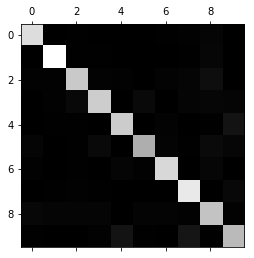

In [14]:
# That's a lot of numbers to look at. IT's often more convenient to look at an image represenation of the confusion matrix.
# In Confusion Matrix, rows represent actual classes, while columns represent predicted classes.
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

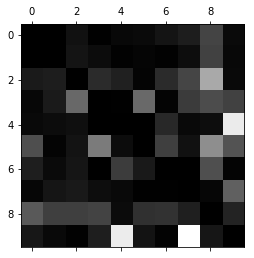

In [15]:
# Let's focus the plot on the errors. Let's compare error rates instead of absolute number of errors.

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# Now let's fill the diagonal with zeros to keep only the errors

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()